In [2]:
from functools import partial

import torch
from matplotlib import pyplot as plt

In [6]:
%load_ext autoreload
%autoreload 2

import numpy as np
import torch

torch.set_printoptions(linewidth=400, threshold=100000)

import sys

sys.path.append("../..")

from mlstm_kernels.components.ln import MultiHeadLayerNorm

import torch.nn.functional as F
from mlstm_cells import mlstm_unstable_fgate_ingsig
from sigprop_plots import (
    make_h_output_plot_mlstm_with_internals,
    make_offset_sweep_meshplot,
    make_offset_sweep_meshplot_grid_siging,
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Sigmoid Input Gate: vecI + vecF offset plots

Hypothesis: show that for sigmoid input gate the behavior is similar as for exponential input gate (especially for negative input gate offsets)

the question: How does it behave for higher inputs?

### bfloat16 - debug plots

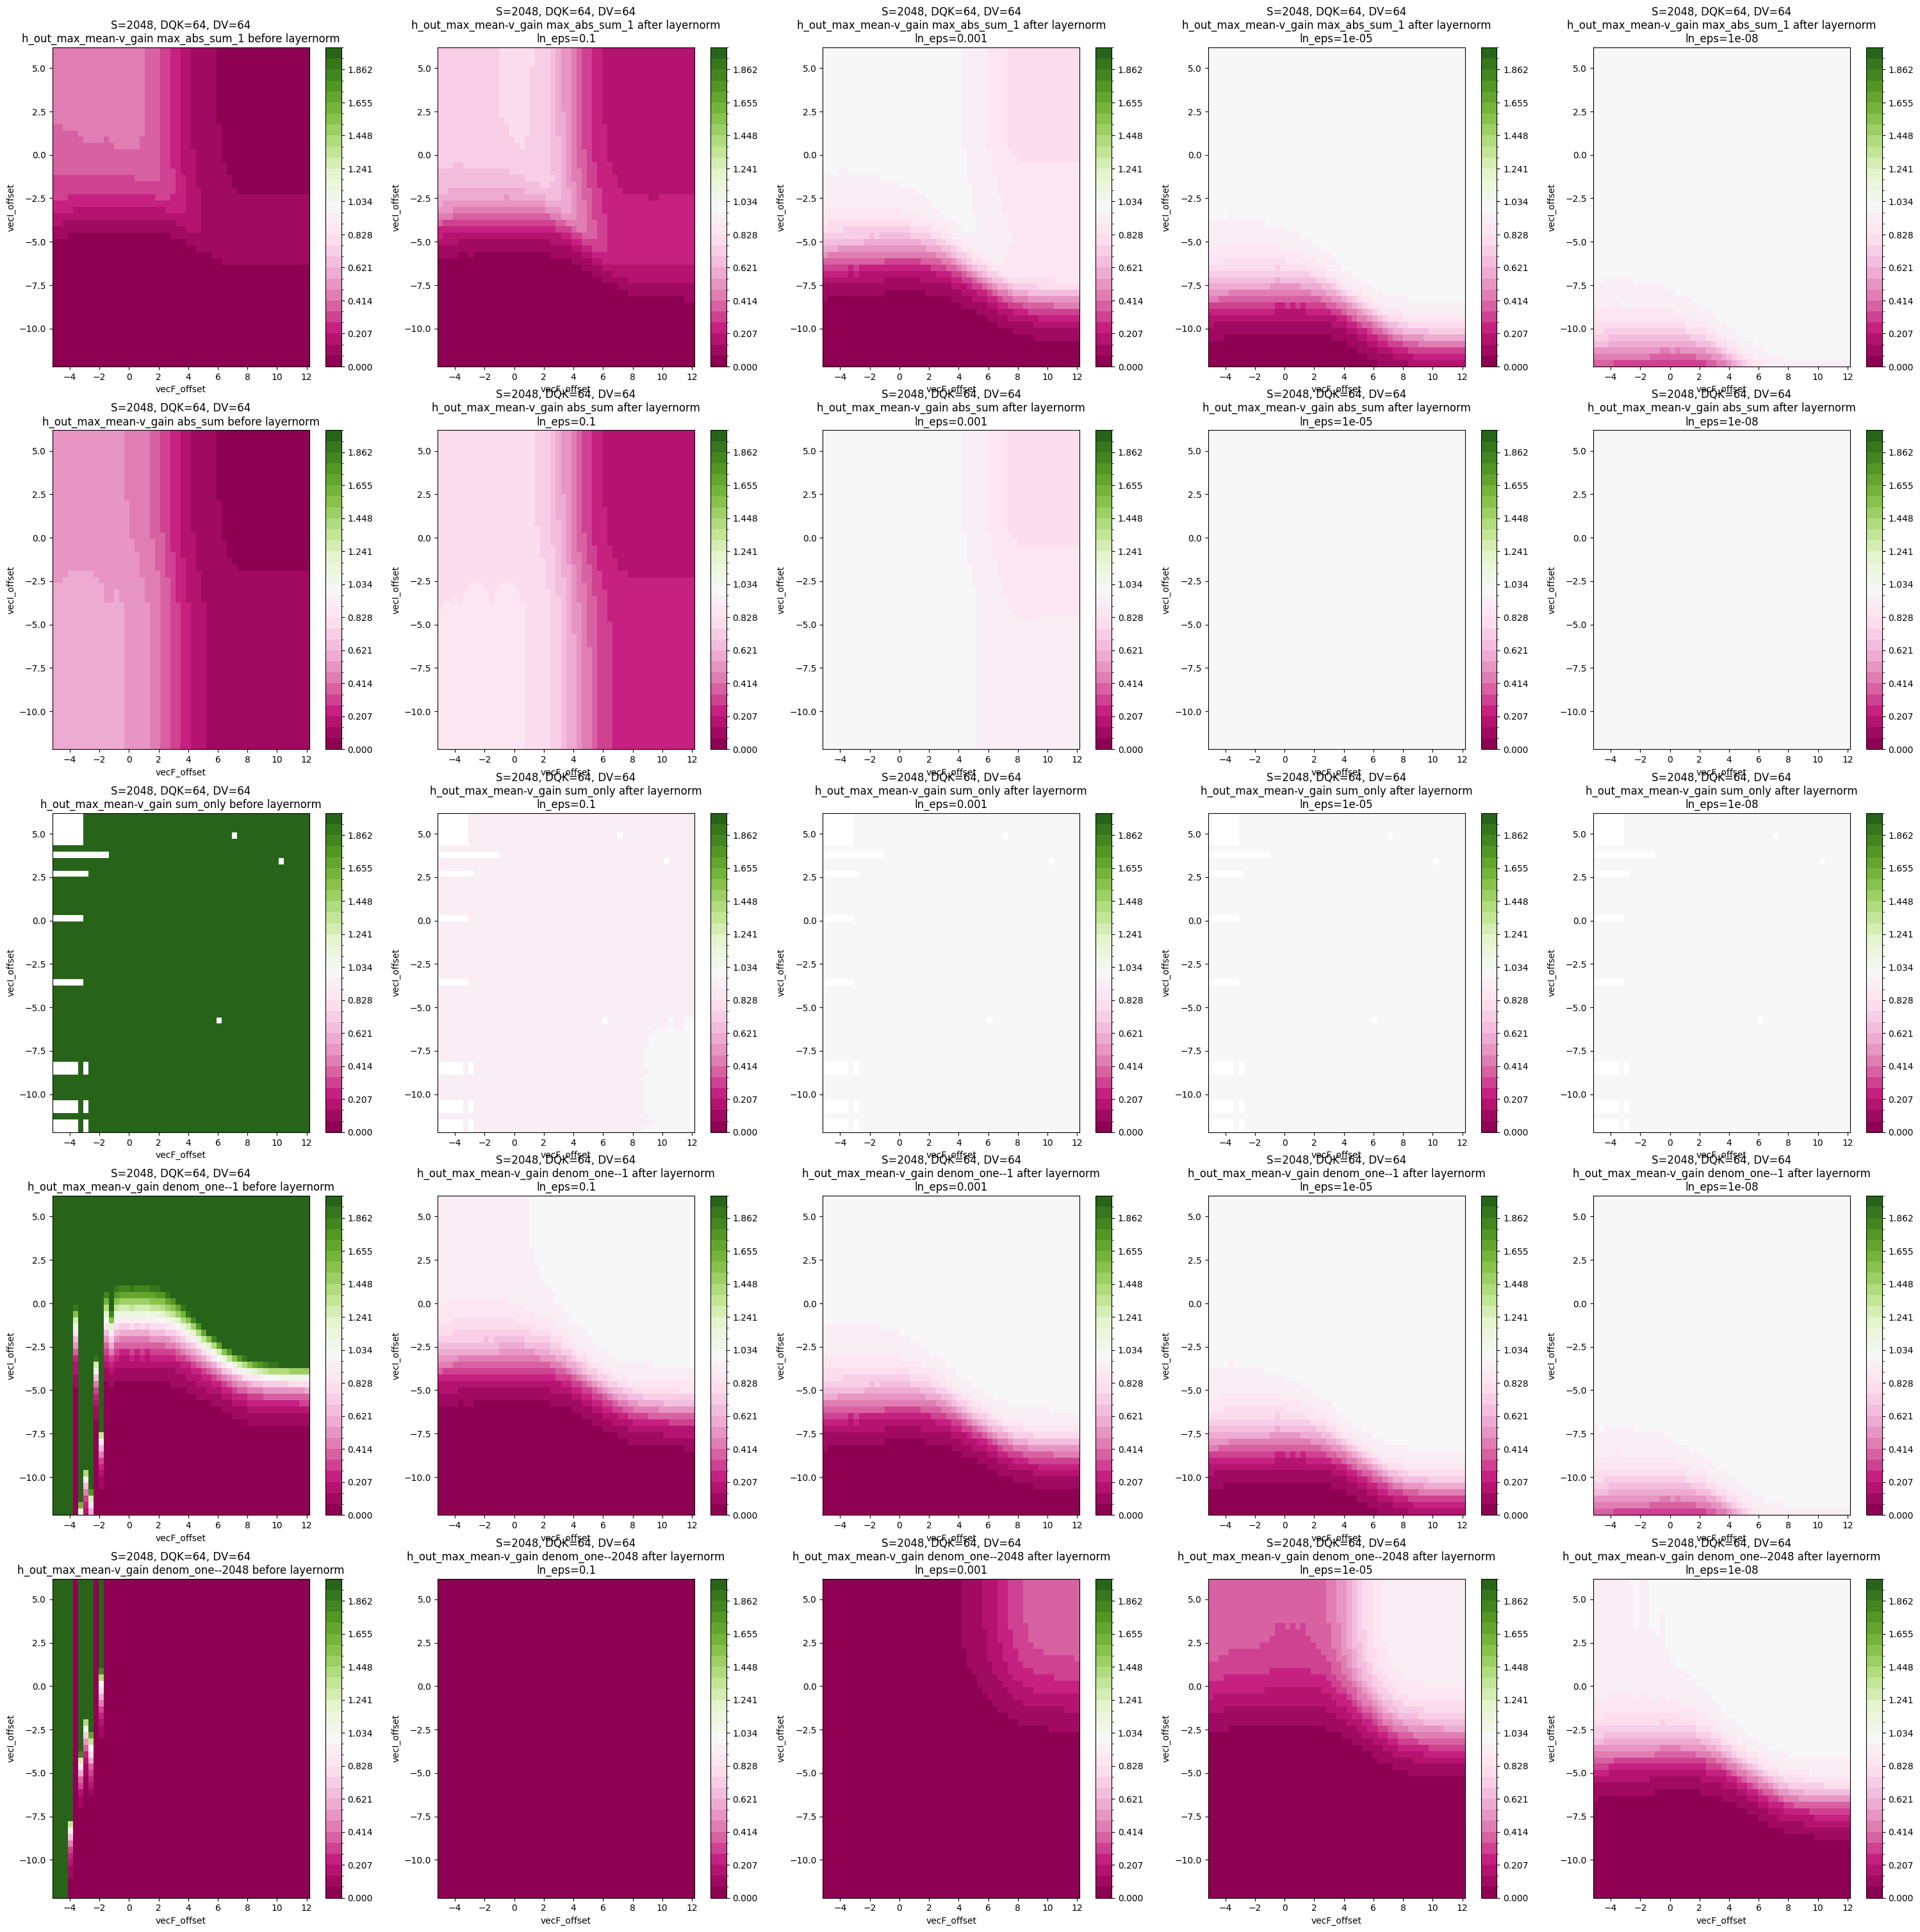

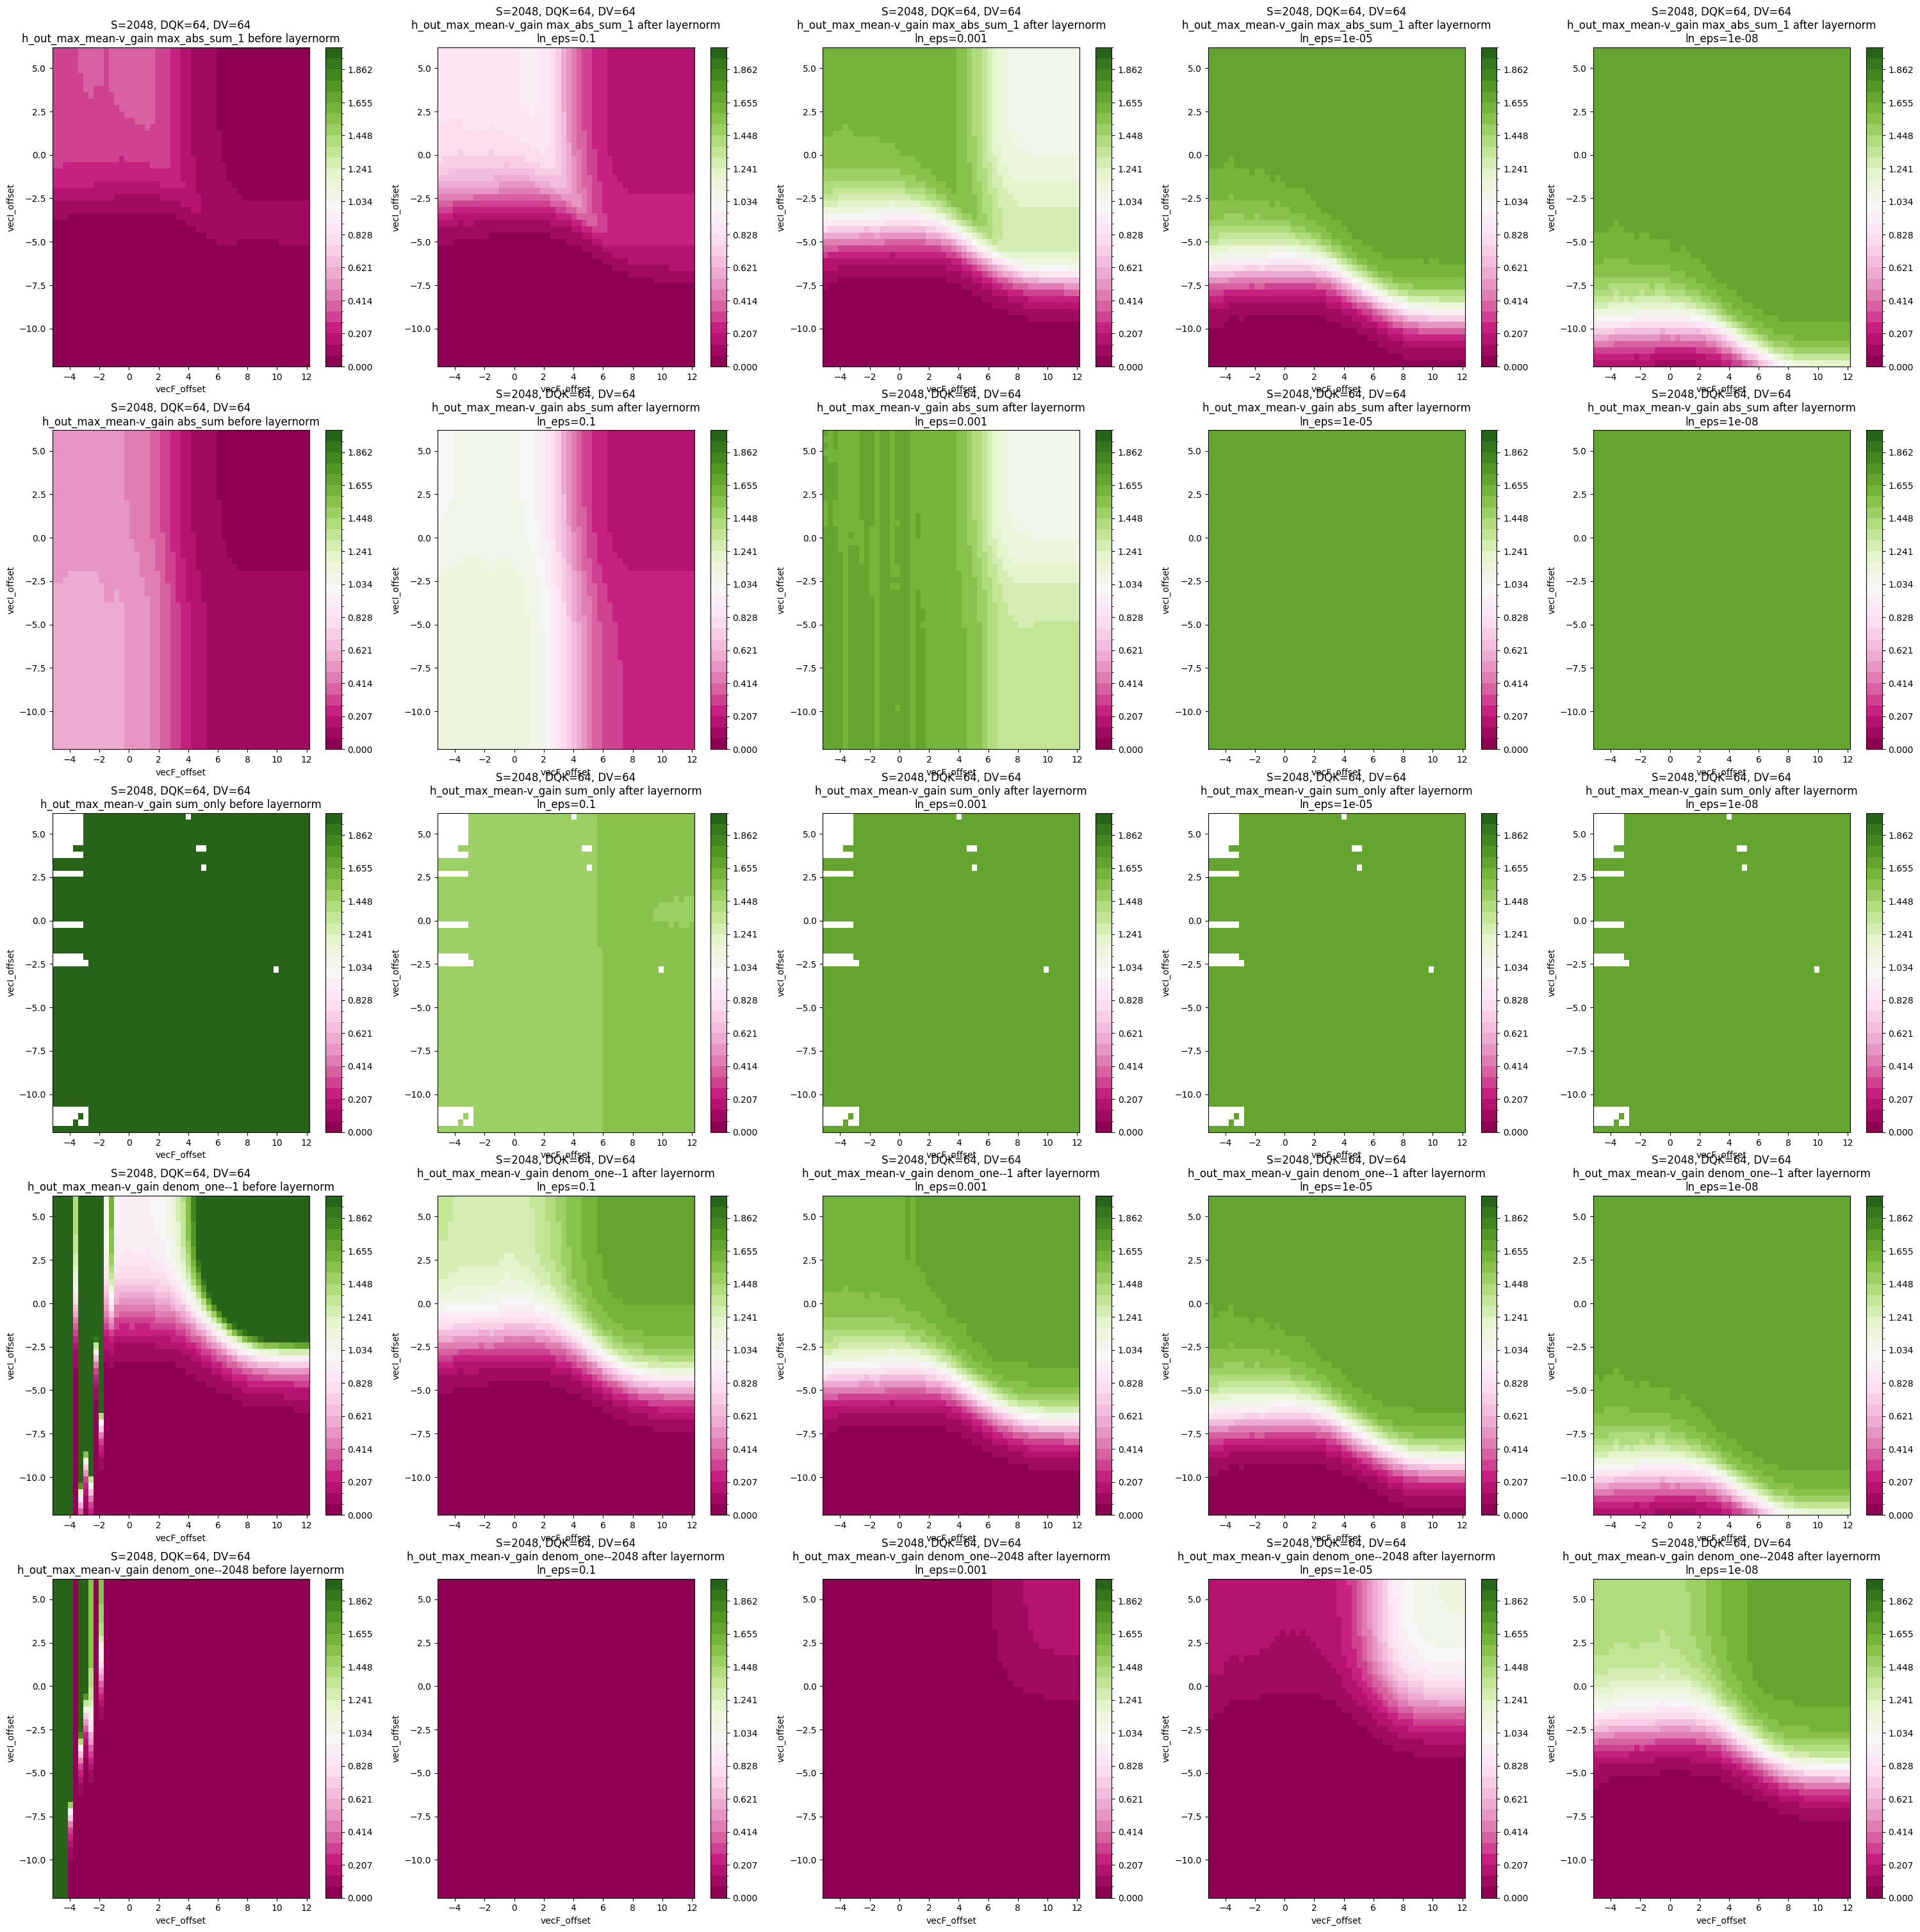

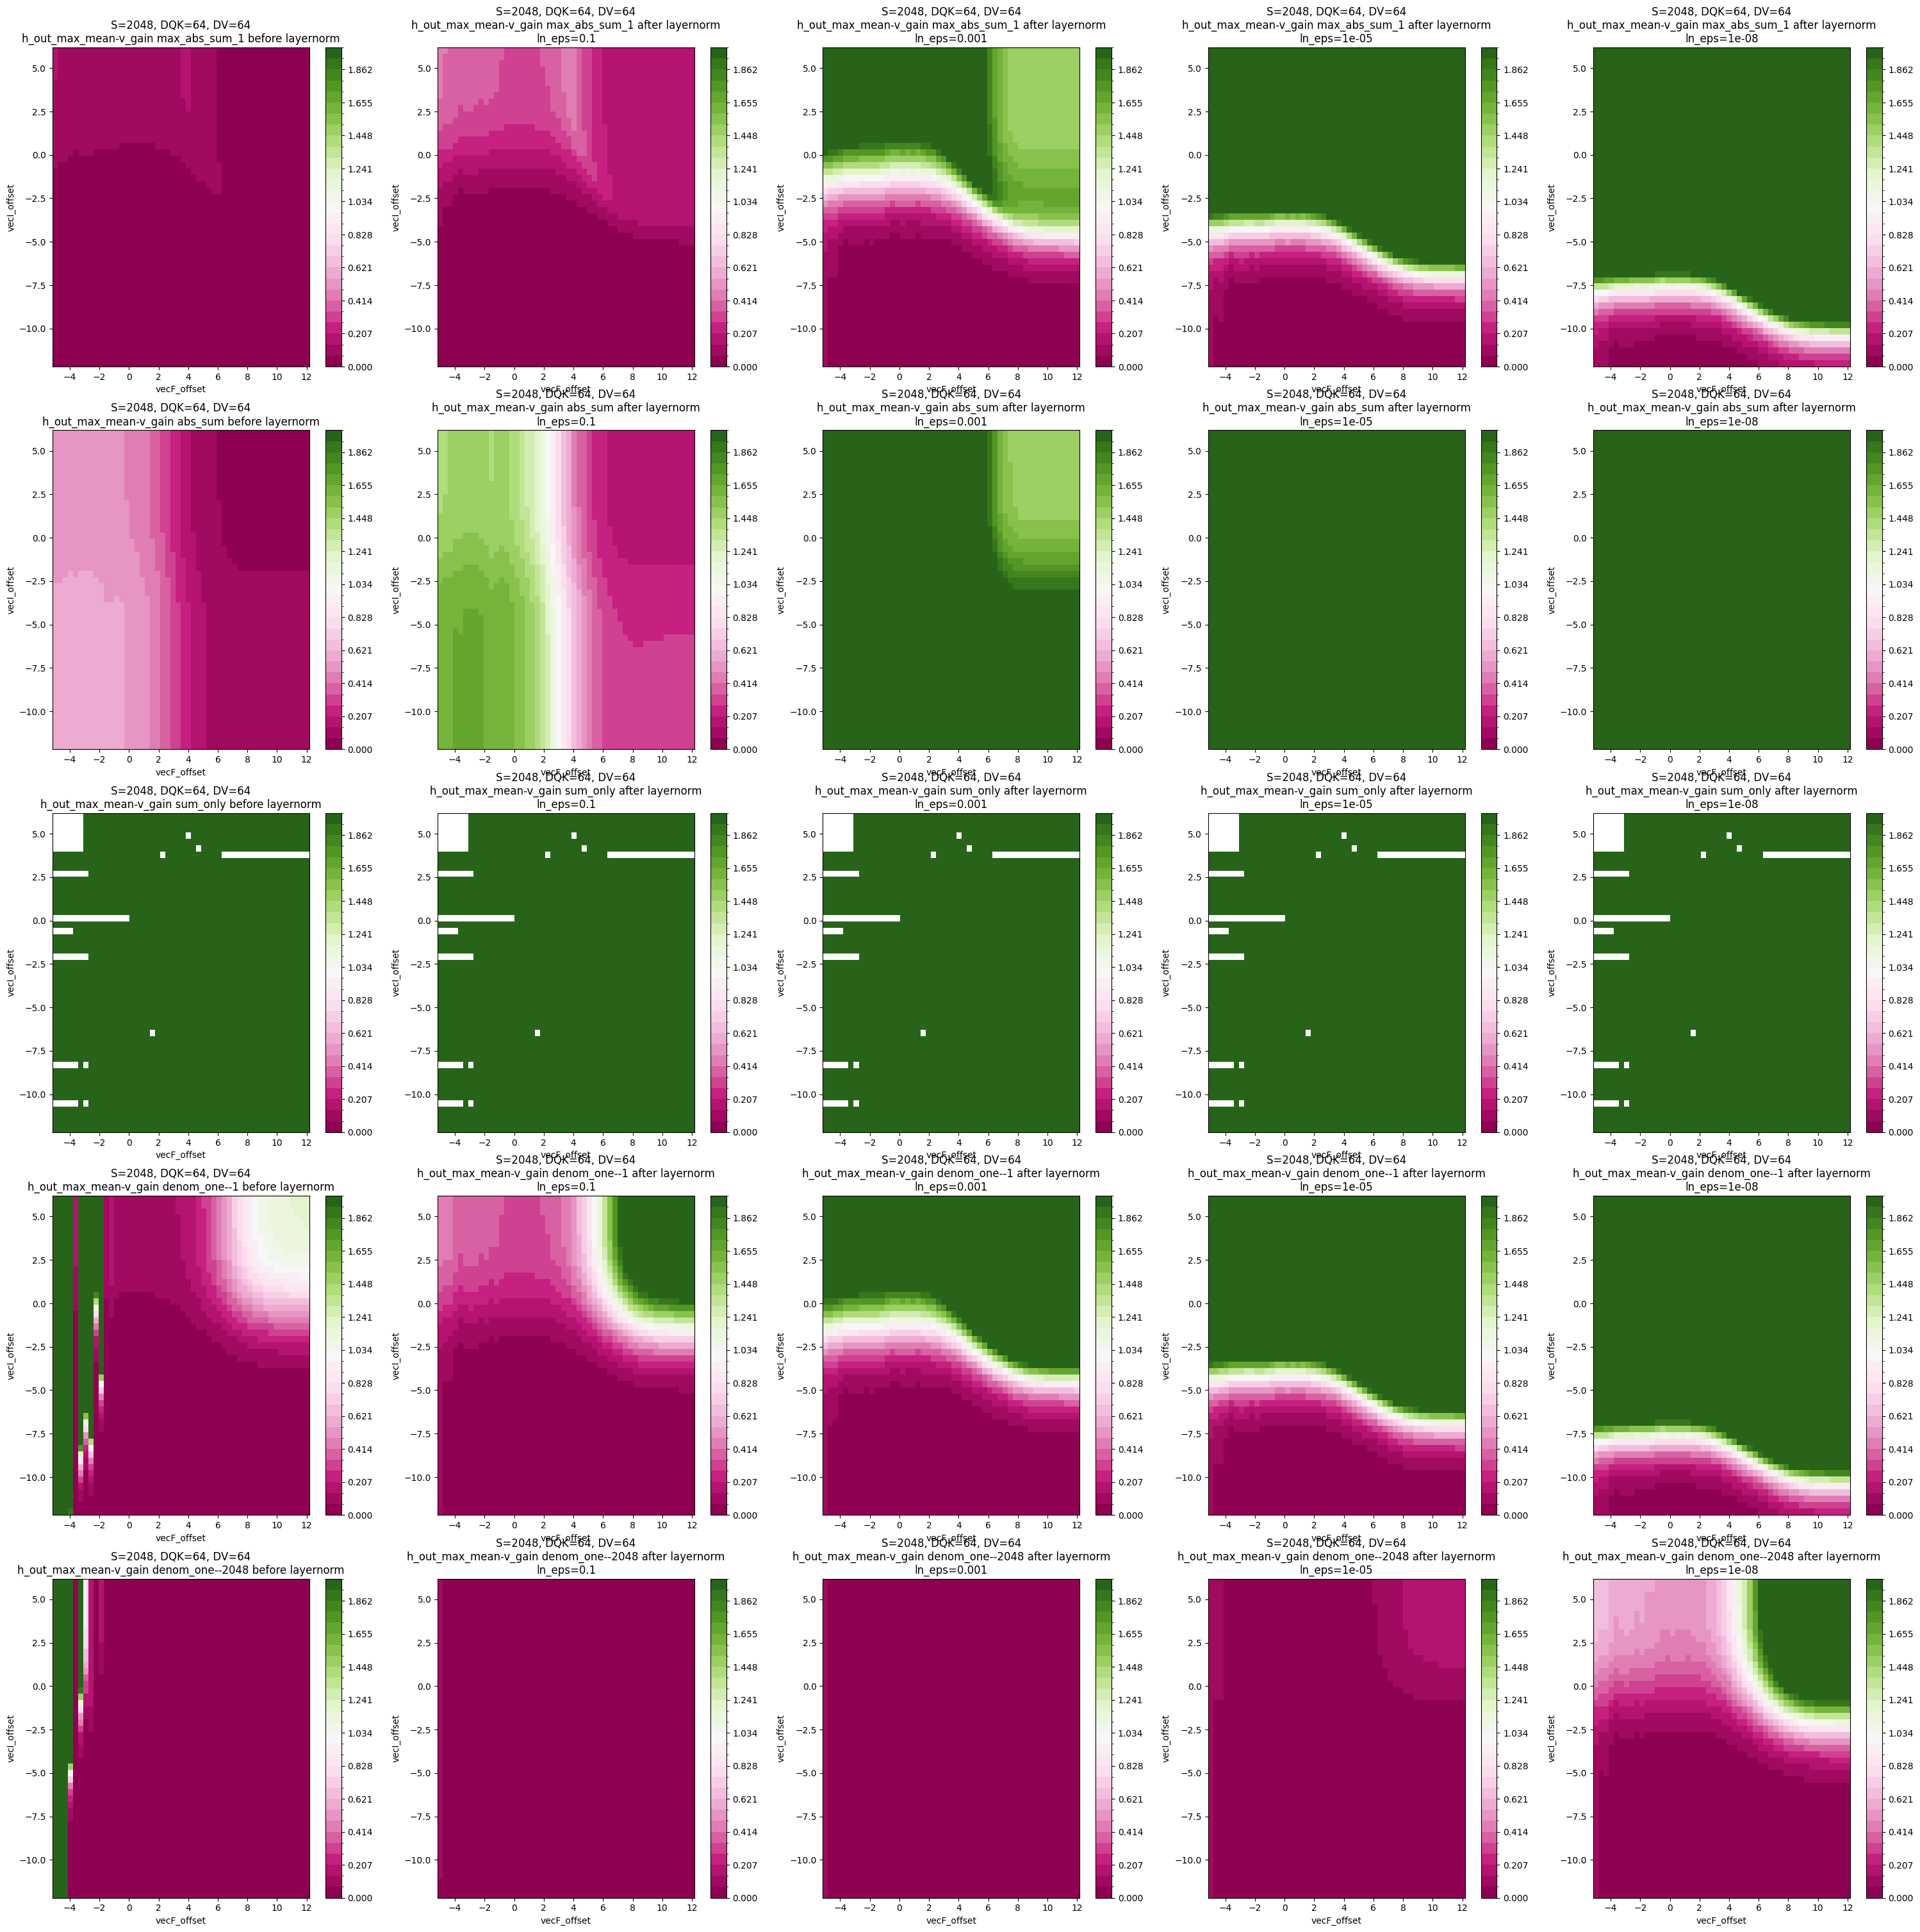

In [5]:
S = 2048
DQK = 64  # 1024
DV = 64  # 1024
DEVICE = torch.device("cuda")
DTYPE = torch.bfloat16
vecI_offset_range = torch.linspace(-12, 6, 50)
vecF_offset_range = torch.linspace(-5, 12, 50)
levels_before_ln = np.linspace(0, 2, 30)
levels_after_ln = np.linspace(0, 2, 30)
in_stds = [1.0]  # [0.25, 0.5, 1.0]
ln_epss = [1e-1, 1e-3, 1e-5, 1e-8]  # , 1e-10]
norm_type = "rms"
denom_const_vals = [1, 2048]
figs = []
for std in in_stds:
    fig = make_offset_sweep_meshplot_grid_siging(
        mlstm_func=partial(mlstm_unstable_fgate_ingsig, eps=0.0),
        seq_len=S,
        dqk=DQK,
        dv=DV,
        device=DEVICE,
        dtype=DTYPE,
        vecI_offset_range=vecI_offset_range,
        vecF_offset_range=vecF_offset_range,
        q_std=std,
        k_std=std,
        v_std=std,
        levels_before_ln=levels_before_ln,
        levels_after_ln=levels_after_ln,
        norm_eps=ln_epss,
        denom_const_vals=denom_const_vals,
        metric="h_out_abs_max_mean-v_gain",
        norm_type=norm_type,
    )
    figs.append(fig)

### bfloat16 - final plots

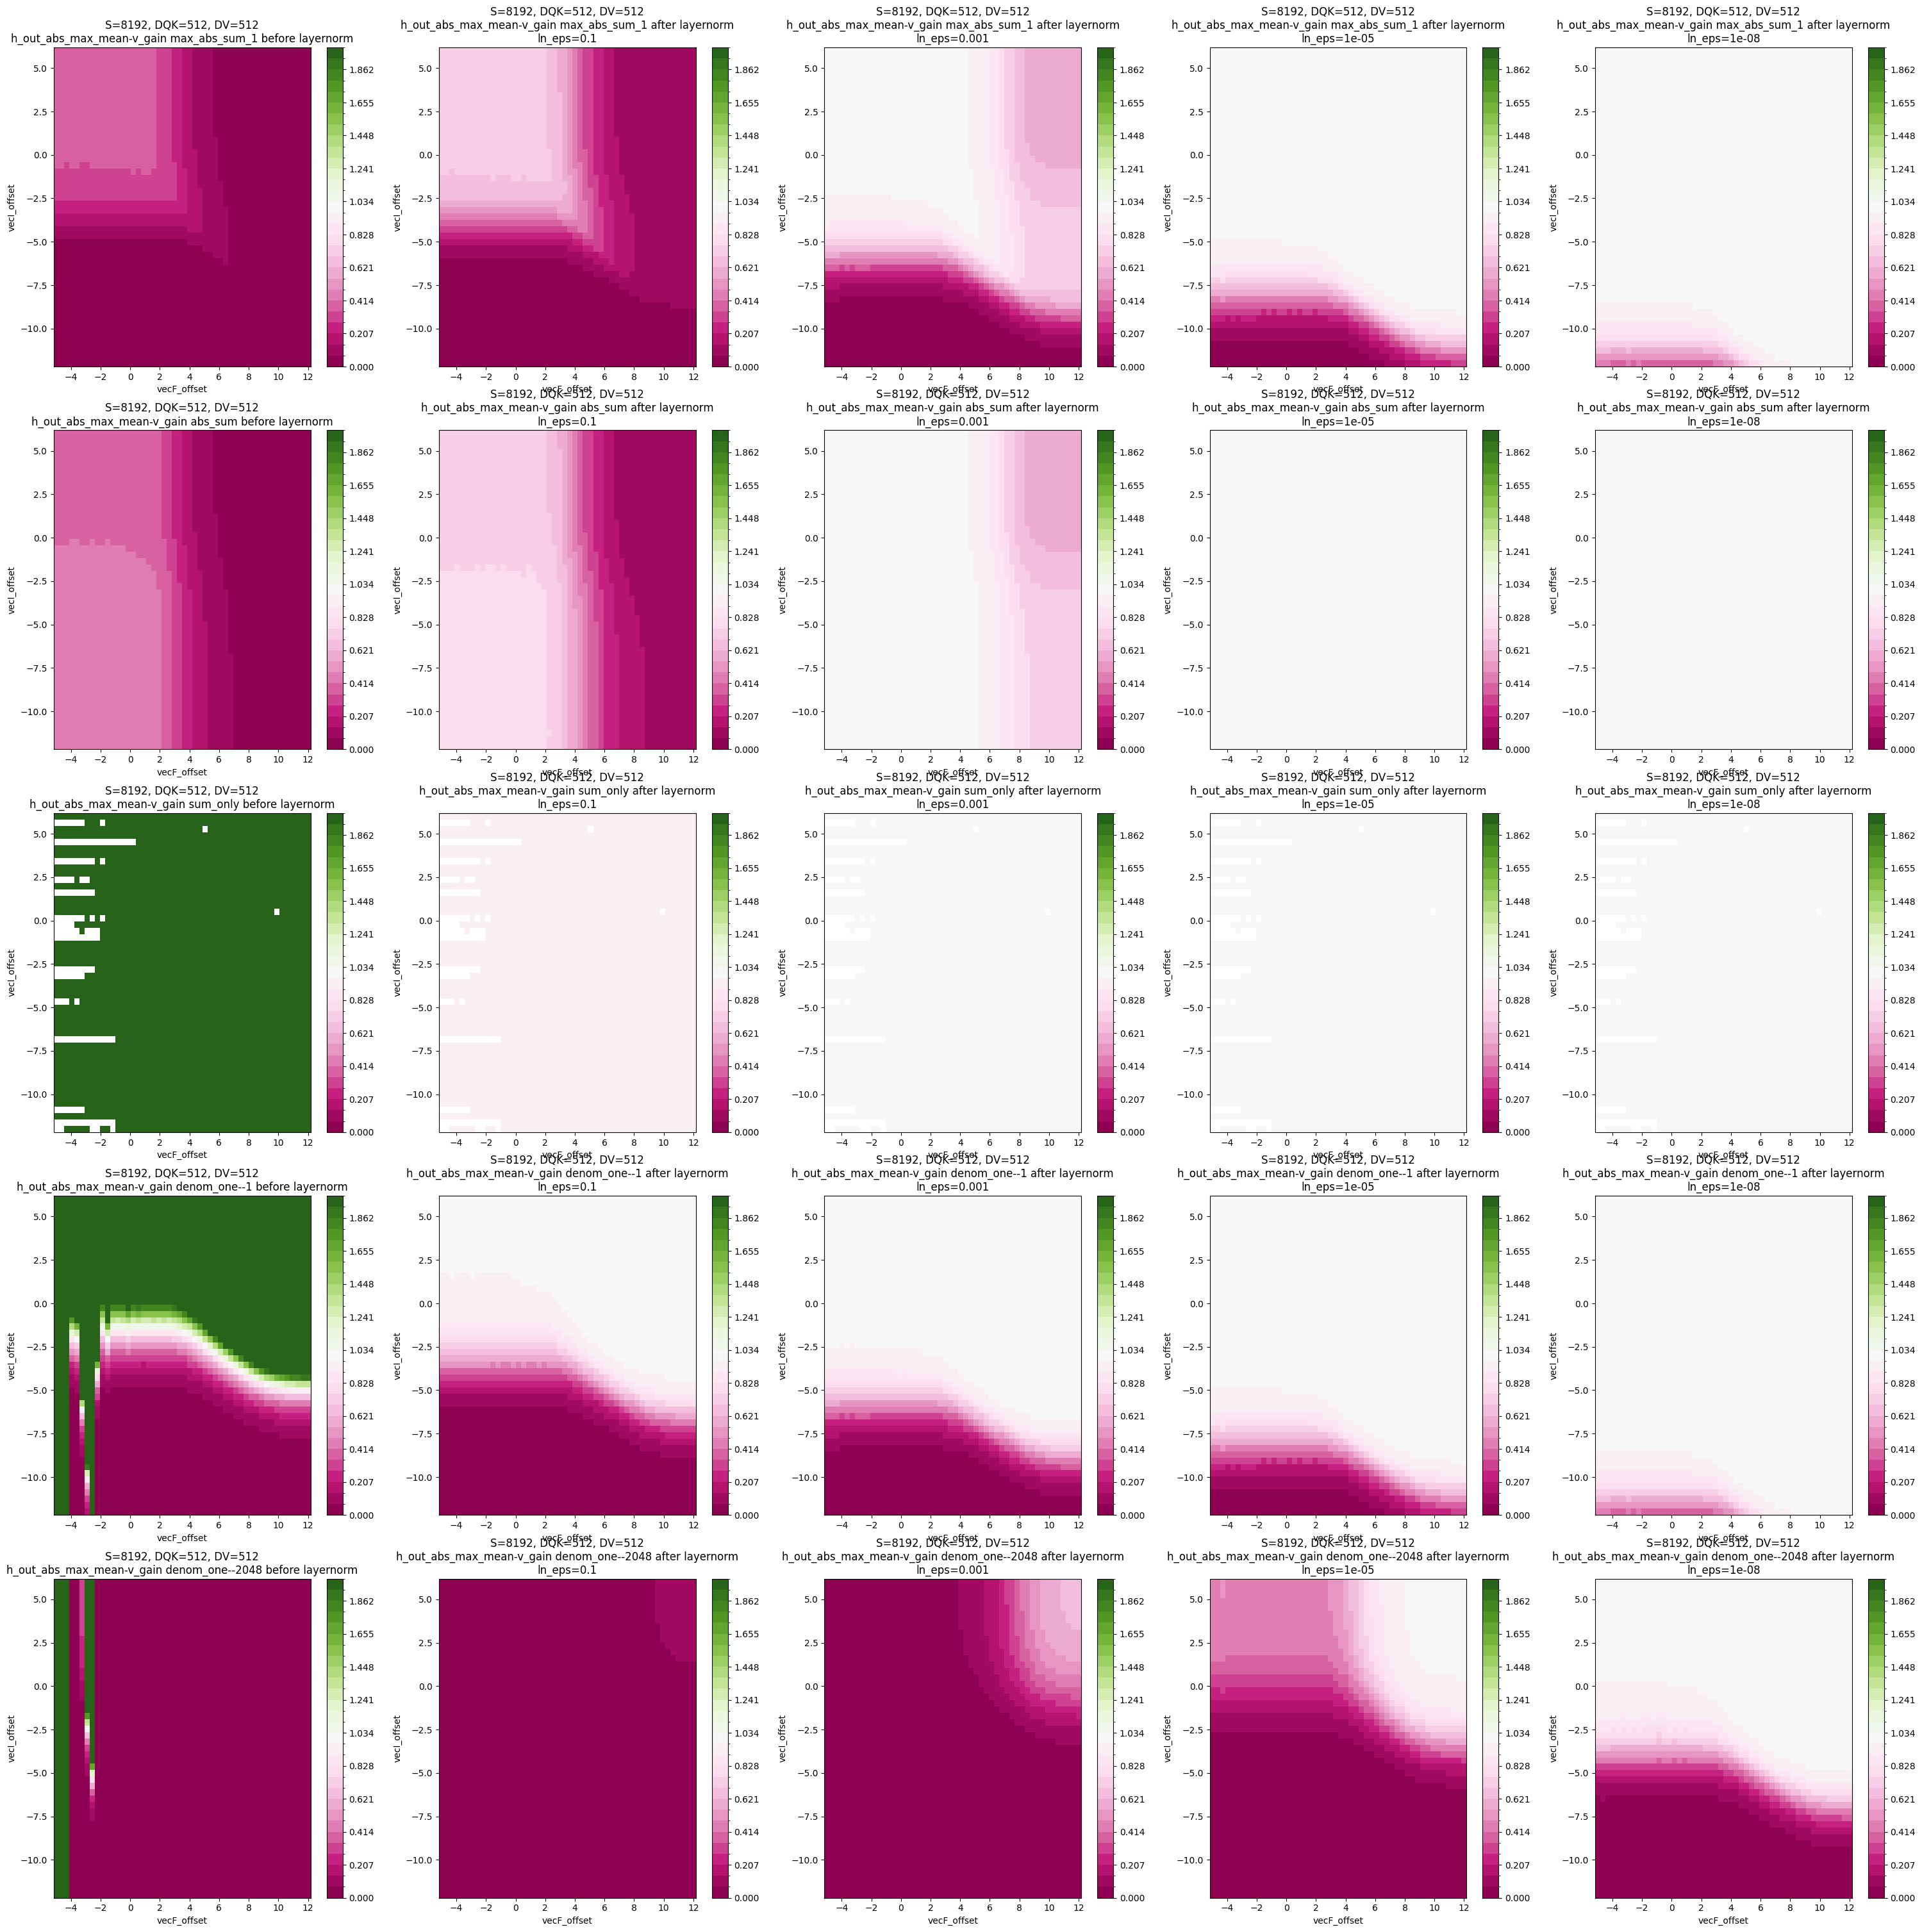

In [5]:
S = 8192
DQK = 512  # 1024
DV = 512  # 1024
DEVICE = torch.device("cuda")
DTYPE = torch.bfloat16
vecI_offset_range = torch.linspace(-12, 6, 50)
vecF_offset_range = torch.linspace(-5, 12, 50)
levels_before_ln = np.linspace(0, 2, 30)
levels_after_ln = np.linspace(0, 2, 30)
in_stds = [1.0]  # [0.25, 0.5, 1.0]
ln_epss = [1e-1, 1e-3, 1e-5, 1e-8]  # , 1e-10]
norm_type = "rms"
denom_const_vals = [1, 2048]
figs = []
for std in in_stds:
    fig = make_offset_sweep_meshplot_grid_siging(
        mlstm_func=partial(mlstm_unstable_fgate_ingsig, eps=0.0),
        seq_len=S,
        dqk=DQK,
        dv=DV,
        device=DEVICE,
        dtype=DTYPE,
        vecI_offset_range=vecI_offset_range,
        vecF_offset_range=vecF_offset_range,
        q_std=std,
        k_std=std,
        v_std=std,
        levels_before_ln=levels_before_ln,
        levels_after_ln=levels_after_ln,
        norm_eps=ln_epss,
        denom_const_vals=denom_const_vals,
        metric="h_out_abs_max_mean-v_gain",
        norm_type=norm_type,
    )
    figs.append(fig)

In [18]:
B = 1
NH = 1
S = 8192
D = 512
DHQK = D
DHV = D
vecI_offset = -3.0  # -3.0
vecF_offset = -5.0
vecI_init_fn = torch.randn
vecF_init_fn = torch.randn

vecI_offs: -3.0, vecF_offs: -5.0
S: 8192, B: 1, NH: 1, DHQK: 512, DHV: 512


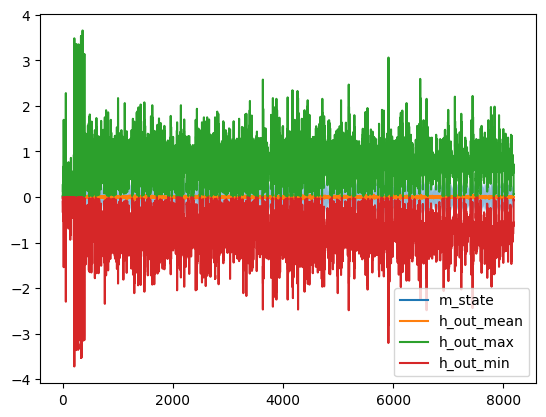

In [19]:
_ = make_h_output_plot_mlstm_with_internals(
    mlstm_func=partial(mlstm_unstable_fgate_ingsig, eps=0.0, normalization_mode="max_abs_sum_1"),
    B=B,
    NH=NH,
    S=S,
    DHQK=DHQK,
    DHV=DHV,
    vecI_offset=vecI_offset,
    vecF_offset=vecF_offset,
    seed=0,
    vecI_init_fn=vecI_init_fn,
    vecF_init_fn=vecF_init_fn,
    DTYPE=DTYPE,
)

## Single offset sweep plots.

In [ ]:
vecI_offset_range = torch.linspace(-8, 6, 50)
vecF_offset_range = torch.linspace(-5, 12, 50)
fig = make_offset_sweep_meshplot(
    mlstm_func=partial(mlstm_paper_unstable_fgate, mstate_mode="paper"),
    seq_len=2048,
    dqk=1024,
    dv=1024,
    vecI_offset_range=vecI_offset_range,
    vecF_offset_range=vecF_offset_range,
    dtype=torch.float64,
    device=torch.device("cuda"),
)